In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
#checking the shape 
df.shape

(30, 17)

In [5]:
#checking the null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [15]:
#changing the name of the columns

df=df.rename(columns={'W':'Wins','R':'Runs', 'AB':'At_Bats', 'H':'Hits', '2B':'Doubles', '3B':'Triples', 'HR':'Homeruns', 'BB':'Walks', 'SO':'Strikeouts', 'SB':'Stolen_Bases', 'RA':'Runs_Allowed', 'ER':' Earned_Runs',
       'ERA':'Earned_Run_Average', 'CG':'Complete_Games ', 'SHO':'Shutouts', 'SV':'Saves', 'E':'Errors'})

In [16]:
df.head()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average,Complete_Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [17]:
df.describe()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average,Complete_Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


OBSERVATIONS

1.There is no null values


2.There is differnce between the mean and standard values, so there are outliers

#EDA

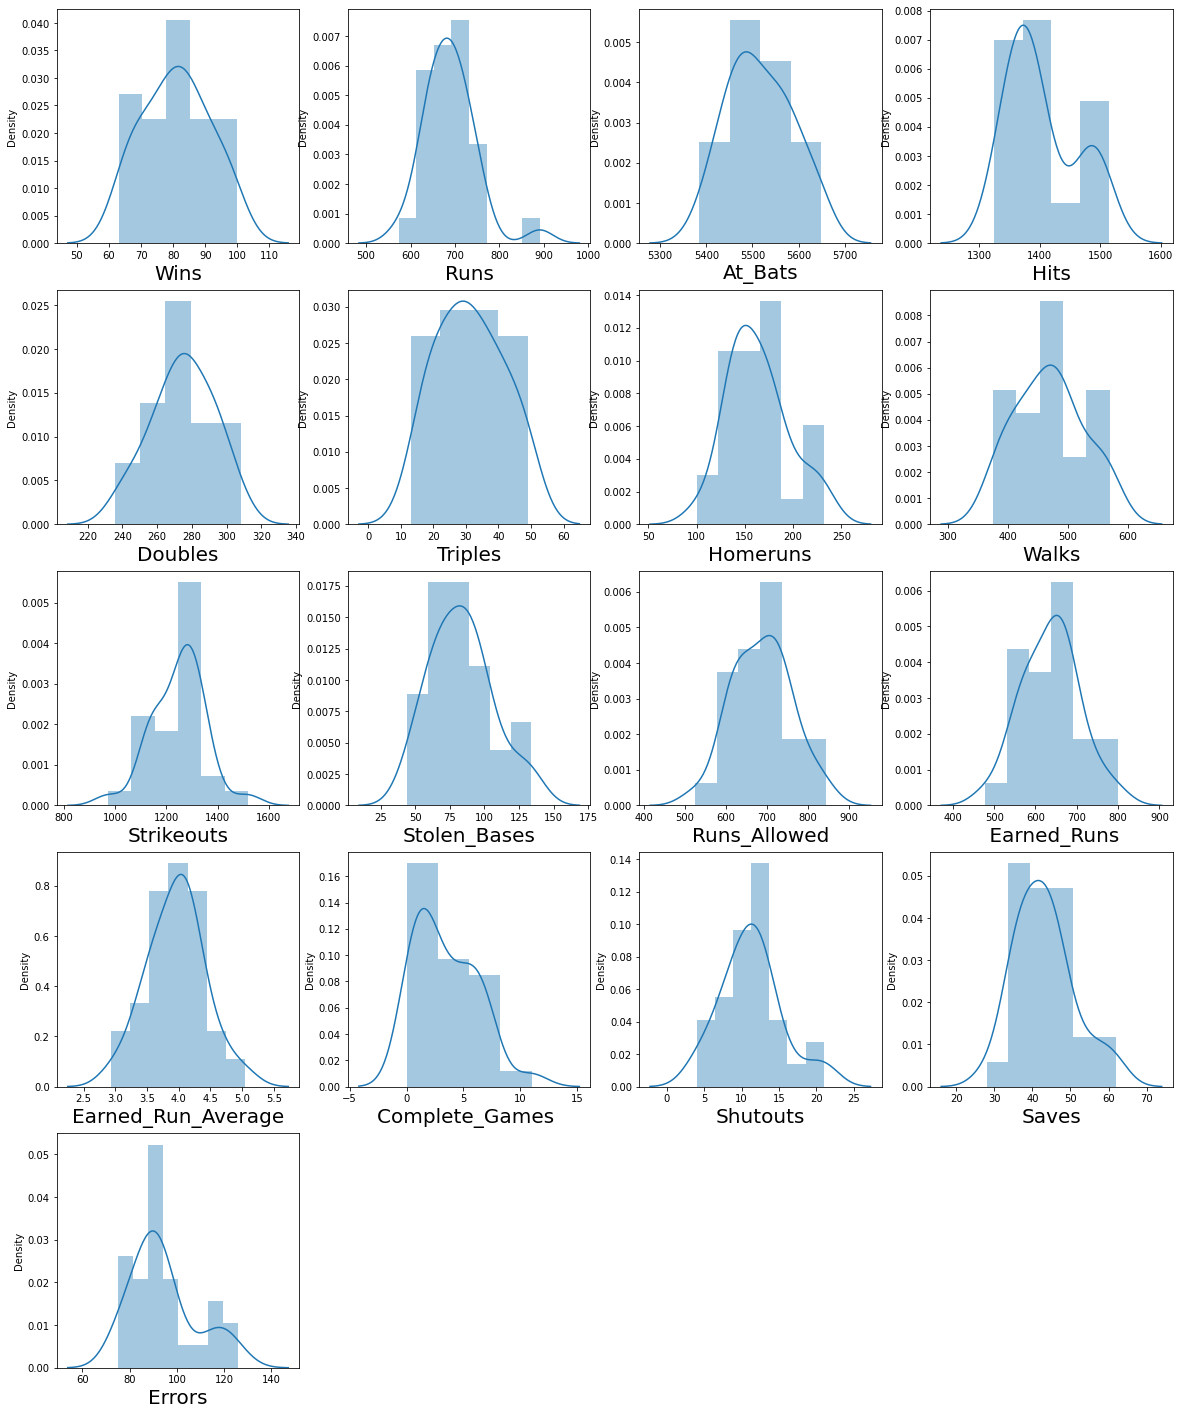

In [18]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
  if plotnumber <=17:
    ax=plt.subplot(5,4,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=20)

    plotnumber +=1


plt.show()

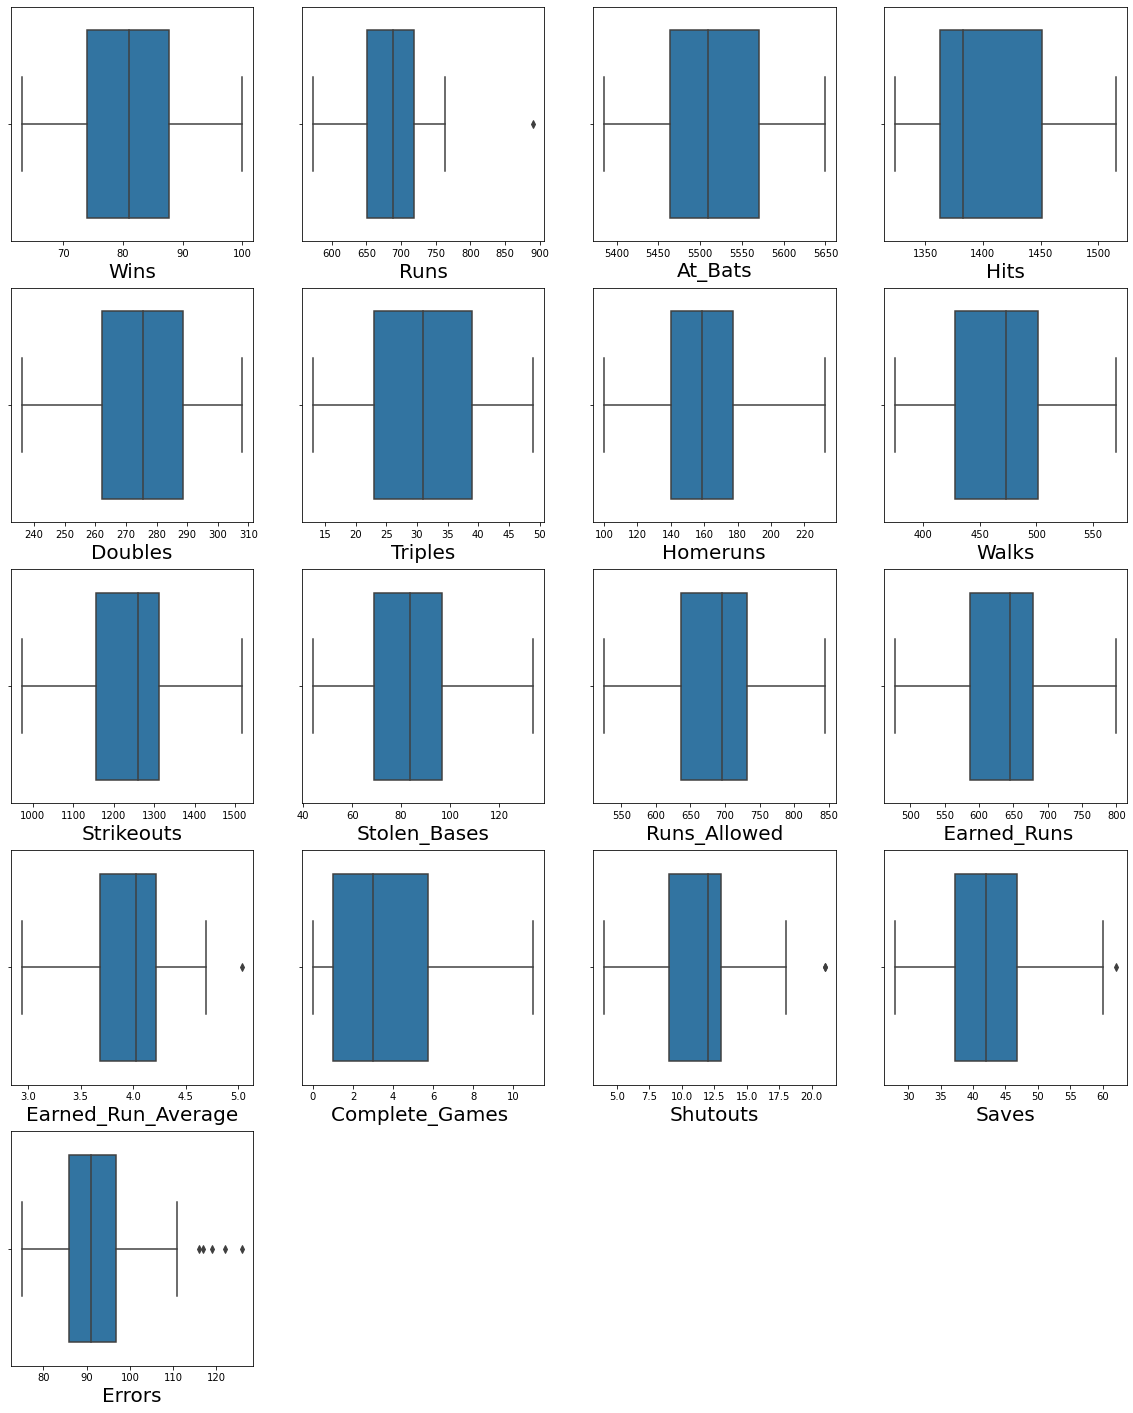

In [19]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
  if plotnumber <=17:
    ax=plt.subplot(5,4,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=20)

    plotnumber +=1


plt.show()

#Removing Outliers

In [11]:
df.shape

(30, 17)

In [12]:
#find the IQR(INTER QUANTILE RANGE) to identify outliers

#1st quantile
q1=df.quantile(0.25)

#3rd quantile
q3=df.quantile(0.75)

iqr=q3 - q1

In [14]:
#importing zscore to remove outliers

from scipy.stats import zscore

In [20]:
z_score=zscore(df)

In [21]:
abs_z_score=np.abs(z_score)

In [22]:
filtering_entry=(abs_z_score < 3).all(axis=1)

In [23]:
df=df[filtering_entry]

In [25]:
df.shape

(29, 17)

In [24]:
#statistics of data after removing outliers

df.describe()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average,Complete_Games,Shutouts,Saves,Errors
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,1400.896552,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,636.758621,3.961724,3.344828,11.344828,43.379310,94.551724
std,10.384006,45.357040,71.701076,56.264265,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,71.195734,0.461148,2.729153,4.185655,7.816712,14.153713
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,650.000000,5463.000000,1363.000000,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,584.000000,3.670000,1.000000,9.000000,38.000000,86.000000
50%,81.000000,689.000000,5511.000000,1382.000000,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,646.000000,4.030000,3.000000,12.000000,43.000000,92.000000
75%,87.000000,713.000000,5571.000000,1420.000000,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,680.000000,4.240000,5.000000,13.000000,47.000000,97.000000
max,100.000000,764.000000,5649.000000,1515.000000,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [26]:
X=df.drop(['Wins'],axis=1)
y=df['Wins']

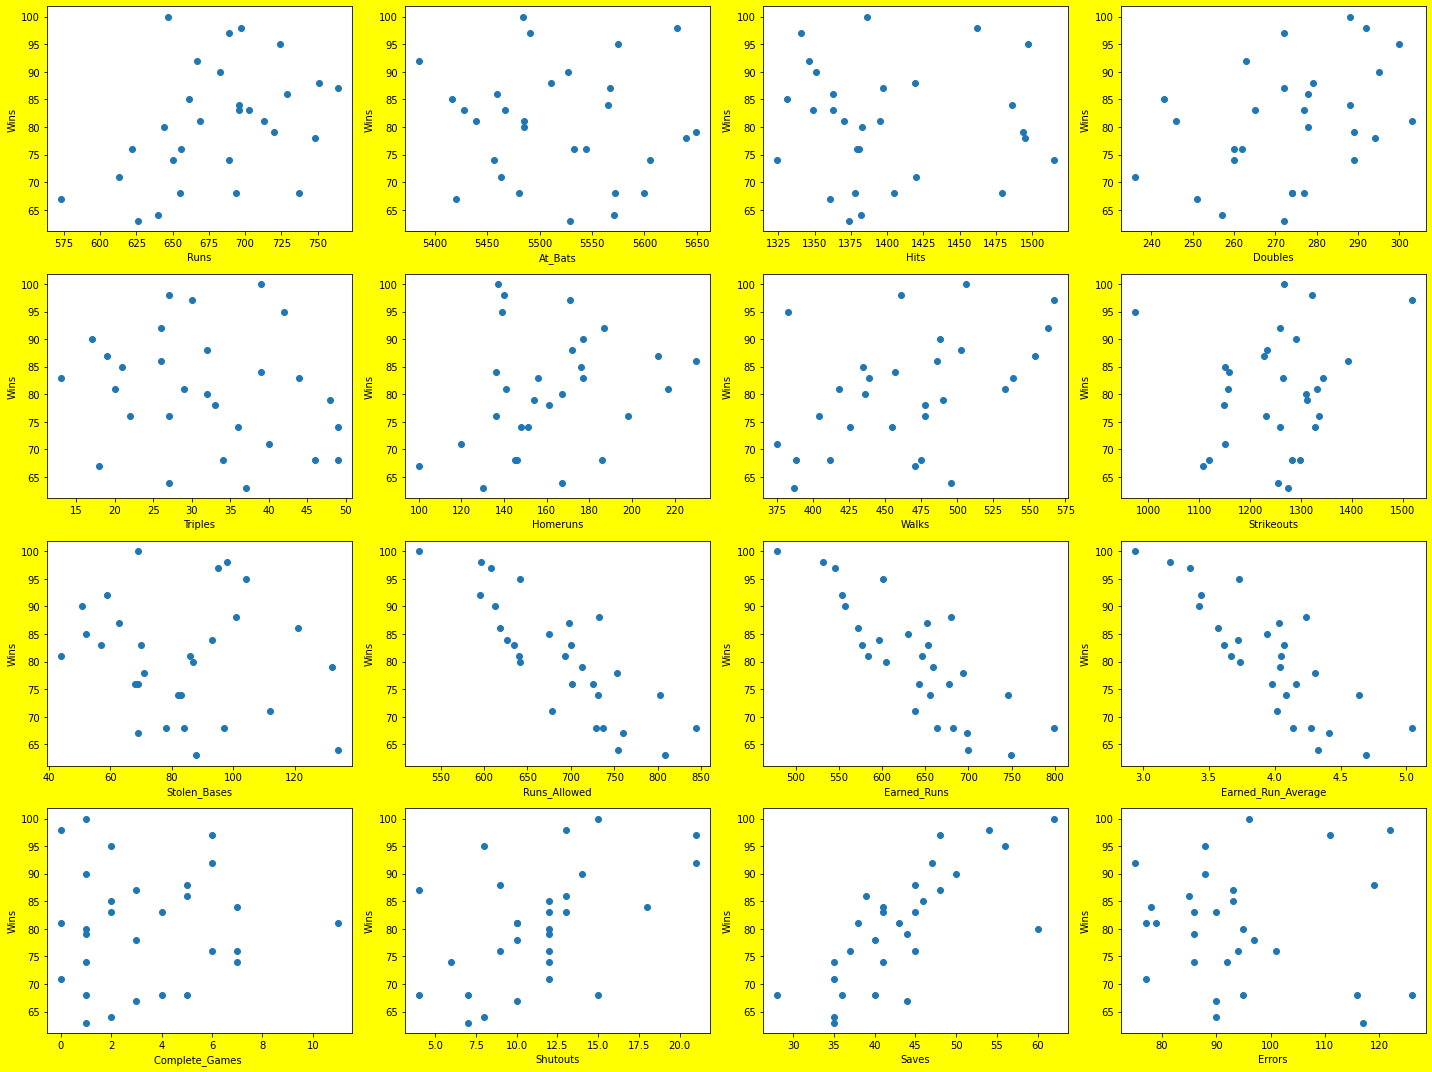

In [27]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber= 1

for column in X:
    if plotnumber <= 16:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Wins',fontsize=10)
        
        
    plotnumber+=1
plt.tight_layout()

At_bats, Hits, Runs_allowed, Earned_runs have zero relation with the Wins.

most columns have linear relation with the target variable.

In [37]:
from sklearn.feature_selection import SelectPercentile, chi2

In [38]:
X=df.drop(['Wins'],axis=1)
y=df['Wins']

In [39]:
SPercentile=SelectPercentile(score_func=chi2,percentile=80)

SPercentile=SPercentile.fit(X,y)

In [40]:
cols=SPercentile.get_support(indices=True)
print('Features Index=',cols)


features=X.columns[cols]
print('Features',list(features))

#THESE ARE 80% BEST FEATURES

Features Index= [ 0  2  4  5  6  7  8  9 10 12 14 15]
Features ['Runs', 'Hits', 'Triples', 'Homeruns', 'Walks', 'Strikeouts', 'Stolen_Bases', 'Runs_Allowed', ' Earned_Runs', 'Complete_Games ', 'Saves', 'Errors']


In [41]:
df_scores=pd.DataFrame({'features':X.columns,'chi2score':SPercentile.scores_,'pvalue':SPercentile.pvalues_})

df_scores.sort_values(by='chi2score',ascending=False)

,features,chi2score,pvalue
7,Strikeouts,204.888061,1.254117e-31
9,Runs_Allowed,197.101792,4.194304e-30
10,Earned_Runs,191.050119,6.351106e-29
8,Stolen_Bases,166.997587,2.809275e-24
6,Walks,139.722802,4.056144e-19
5,Homeruns,114.119949,2.016215e-14
0,Runs,76.195671,6.772880e-08
4,Triples,69.598698,7.648404e-07
15,Errors,53.473438,1.950212e-04
2,Hits,46.054095,1.946075e-03


In [42]:
#creating subset of selected features

X=df[features]

y=df['Wins']

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import  mean_squared_error,mean_absolute_error
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
lr=LinearRegression()
rf=RandomForestRegressor()
dt=DecisionTreeRegressor()


In [54]:
for i in range(0,100):
  x_train,x_test,y_train,y_test=train_test_split(X_scaler,y,test_size=0.20,random_state=i)
  lr.fit(x_train,y_train)
  pred_train=lr.predict(x_train)
  pred_test=lr.predict(x_test)
  if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
    print('At random state',i,'the model performs well')
    print('At random state',i)
    print('Training accuracy of data is :-',r2_score(y_train,pred_train)*100)
    print('Testing accuracy of data is :-',r2_score(y_test,pred_test)*100)
    print('\n')

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=99)

In [49]:
#train the model

lr.fit(x_train,y_train)

LinearRegression()

In [50]:
pred_test=lr.predict(x_test)

In [51]:
print(r2_score(y_test,pred_test))

0.8774713038174338


#Cross Validation 

In [52]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for i in range(2,10):
  cv_score=cross_val_score(lr,X,y,cv=i)
  cv_mean=cv_score.mean()
  print(f'At cross fold {i} cv score is {cv_mean} and the accuracy score is {train_accuracy} and testing score is {test_accuracy}')
  print('\n')

At cross fold 2 cv score is -2.1363784668852133 and the accuracy score is -1.2533065818781548 and testing score is 0.8774713038174338


At cross fold 3 cv score is 0.09668653146520008 and the accuracy score is -1.2533065818781548 and testing score is 0.8774713038174338


At cross fold 4 cv score is 0.5229088792775246 and the accuracy score is -1.2533065818781548 and testing score is 0.8774713038174338


At cross fold 5 cv score is 0.1385801035950763 and the accuracy score is -1.2533065818781548 and testing score is 0.8774713038174338


At cross fold 6 cv score is 0.35866306398438175 and the accuracy score is -1.2533065818781548 and testing score is 0.8774713038174338


At cross fold 7 cv score is 0.11716728371034964 and the accuracy score is -1.2533065818781548 and testing score is 0.8774713038174338


At cross fold 8 cv score is 0.19262491862381698 and the accuracy score is -1.2533065818781548 and testing score is 0.8774713038174338


At cross fold 9 cv score is -6.94228546556875 and 

We will take cv score is 3

In [55]:
cv_score=cross_val_score(lr,X,y,cv=3).mean()

print(f'the cv score is {cv_score} and the accuracy score is {test_accuracy}')

the cv score is 0.09668653146520008 and the accuracy score is 0.8774713038174338


#Randomforest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rf=RandomForestRegressor()

In [58]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [59]:
rf_train_pred=rf.predict(x_train)

In [60]:
rf_test_pred=rf.predict(x_test)

In [61]:
print(r2_score(y_test,rf_test_pred))

0.7523532774945376


#Decision Tree Regressor

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
dt=DecisionTreeRegressor()

In [64]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:
dt_train_pred=dt.predict(x_train)

In [66]:
dt_test_pred=dt.predict(x_test)

In [67]:
print(r2_score(y_test,dt_test_pred))

0.6678805535324108


#SAVING THE MODEL

In [68]:
import joblib

In [69]:
joblib.dump(lr,'baseball.obj')

['baseball.obj']

In [71]:
model=joblib.load('baseball.obj')

In [72]:
result=model.predict(x_test)

In [73]:
r2_score(y_test,result)

0.8774713038174338

In [74]:
predicted_values=pd.DataFrame({'Actual':y_test,'Predicted':result})

In [75]:
predicted_values

,Actual,Predicted
23,67,67.502445
24,63,61.498287
17,97,89.394428
13,76,74.990062
21,83,86.723994
25,92,85.924296
